# University Rankings

In [482]:
%matplotlib inline
import pandas as pd
import numpy as np
times_data = pd.read_csv("data/timesData.csv")

# Female male ratio as number
female_to_male = times_data['female_male_ratio'].str.split(' : ')
female = female_to_male.str[0].replace('-', None)
female = female[female.notnull()].astype(int)
male = female_to_male.str[1]
male = male[male.notnull()].astype(int)
times_data['female_male_ratio'] = female / male

# International students as real number
international = times_data['international_students'].str.replace('%', '')
international = international[international.notnull()].astype(int)
times_data['international_students'] = international

# Remove comma from num_students
num_students = times_data['num_students'].str.replace(',', '')
num_students = num_students[num_students.notnull()].astype(int)
times_data['num_students'] = num_students

# Scores
scores = times_data['total_score']
scores = scores.replace('-', None)
scores = scores[scores.notnull()].astype(float)
times_data['total_score'] = scores

times_data.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27.0,0.492537,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,0.587302,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,0.724138,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27.0,0.818182,2011


In [483]:
shanghai_data = pd.read_csv("data/shanghaiData.csv")
shanghai_data.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


In [484]:
world_data = pd.read_csv("data/cwurData.csv")
world_data.columns = ['world_rank', 'university_name', 'country', 'national_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 'total_score', 'year']
world_data['world_rank'] = world_data['world_rank'].astype(str)
world_data.head()

,world_rank,university_name,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,total_score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [502]:
#world_data.describe()
#shanghai_data.describe()
#times_data.describe()

## UWaterloo

In [488]:
import seaborn as sb
name = 'University of Waterloo'

In [489]:
# TODO convert inner to lambda mapping
def rank_over_time(ranking_table, university_name):
    university_data = ranking_table.loc[ranking_table['university_name']==name]
    ranking_by_year = university_data.loc[:,['world_rank','year']]
    ranking_bounds = ranking_by_year['world_rank'].str.split('-')
    not_range_mask = ranking_bounds.str[1].isnull()
    rankings = []
    for i, bound in enumerate(ranking_bounds.values):
        if len(bound) > 1:
            bound[0] = (int(bound[0]) + int(bound[1]))/2
        rankings.append(int(bound[0]))
    rankings
    years = ranking_by_year['year'].values
    rankingToYear = pd.DataFrame({ 'rank' : rankings, 'year' : years })
    return rankingToYear

In [490]:
times_data_plot = rank_over_time(times_data, name)
shanghai_data_plot = rank_over_time(shanghai_data, name)
world_data_plot = rank_over_time(world_data, name)
times_data_plot['kind'] = 'Times'
shanghai_data_plot['kind'] = 'Shanghai'
world_data_plot['kind'] = 'World'
graph_data = times_data_plot.append(shanghai_data_plot).append(world_data_plot)
graph_data.head()

,rank,year,kind
0,213,2012,Times
1,238,2013,Times
2,238,2014,Times
3,263,2015,Times
4,179,2016,Times


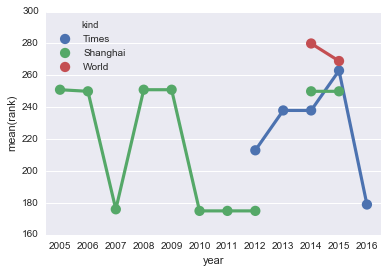

In [491]:
g = sb.pointplot(x='year', y='rank', hue='kind', data=graph_data)

## Predicting Scores

In [492]:
shanghai_scored_data = shanghai_data[shanghai_data.total_score.notnull()]
times_scored_data = times_data[times_data.total_score.notnull()]
world_scored_data = world_data[world_data.total_score.notnull()]

In [493]:
#X = times_scored_data.loc[:,['teaching', 'international', 'research', 'citations', 'income', 'num_students',
#       'student_staff_ratio', 'international_students', 'female_male_ratio', 'year']]
# Dont want to clean any more data for now
X = times_scored_data.loc[:,['teaching', 'research', 'citations', 'year']]
y = times_scored_data['total_score']

In [494]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [496]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [499]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [500]:
clf.score(X_train, y_train)

0.8324491265522328

In [501]:
clf.score(X_test, y_test)

0.82652034094560345

## Extra Data Sets

In [316]:
school_and_country = pd.read_csv("data/school_and_country_table.csv")
#educational_attainment = pd.read_csv("data/educational_attainment_supplementary_data.csv")
#education_expenditure = pd.read_csv("data/education_expenditure_supplementary_data.csv")

In [317]:
school_and_country = pd.read_csv("data/school_and_country_table.csv")
school_and_country.head()

,school_name,country
0,Harvard University,United States of America
1,California Institute of Technology,United States of America
2,Massachusetts Institute of Technology,United States of America
3,Stanford University,United States of America
4,Princeton University,United States of America


In [318]:
# Rename columns to match shanghai data set
school_and_country.columns = ['university_name', 'country']
shanghai_data = pd.merge(school_and_country, shanghai_data, on='university_name', left_index=True, how='outer', sort=False)
shanghai_data.sort_index(inplace=True)
shanghai_data.head()

,university_name,country,world_rank,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,Harvard University,United States of America,1,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005.0
1,University of Cambridge,United Kingdom,2,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005.0
2,Stanford University,United States of America,3,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005.0
3,"University of California, Berkeley",United States of America,4,3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005.0
4,Massachusetts Institute of Technology (MIT),NaN,5,4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005.0


In [319]:
# Filter out missing countries (could try to match similar countries later eg MIT)
shanghai_data = shanghai_data[shanghai_data['country'].notnull()]

## Estimate Rankings